## Observations and Insights 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
print(mouse_metadata.columns)
study_results.head(20)

# Print out the columns for my convience
mouse_study_data = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')
print(mouse_study_data.columns)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


In [2]:
# Checking the number of mice in the DataFrame.
# Print out the number of unique mice and the number of rows
print("Number of unique mice:  " + str(mouse_study_data['Mouse ID'].nunique()))
print("Number of mice in data frame:  " + str(mouse_study_data['Mouse ID'].count()))

Number of unique mice:  249
Number of mice in data frame:  1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# use the duplicate function on rows with the same Mouse ID and timepoint

duplicate_mice = mouse_study_data.duplicated(subset=['Mouse ID','Timepoint'])

#If duplicates are found printth emouse ID and save the ID to the variable duplicate_list
if duplicate_mice.any():
        print("Duplicate Mouse ID(s) is(are)  >:" + mouse_study_data.loc[duplicate_mice]['Mouse ID'].unique())
        duplicate_list = mouse_study_data.loc[duplicate_mice]['Mouse ID'].tolist()

['Duplicate Mouse ID(s) is(are)  >:g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# using the variable duplicate_list and creating an index on the column Mouse ID, display the rows associated with the mouse.
# 
mouse_study_temp = mouse_study_data.set_index('Mouse ID')


mouse_study_temp.loc[duplicate_list]



,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
...,...,...,...,...,...,...,...
g989,20,55.326122,1,Propriva,Female,21,26
g989,20,54.657650,1,Propriva,Female,21,26
g989,25,56.045564,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
duplicate_mice2 = clean_mouse_data.duplicated(subset=['Mouse ID','Timepoint'])

if ~duplicate_mice2.any():
        print("No duplicates")

print("Number of unique mice:  " + str(clean_mouse_data['Mouse ID'].nunique()))
print("Number of mice in data frame:  " + str(clean_mouse_data['Mouse ID'].count()))

No duplicates
Number of unique mice:  249
Number of mice in data frame:  1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
# Once the series are created, than put them into a Dataframe and display the information.

regimen_summary_grp =  clean_mouse_data.groupby('Drug Regimen')
regimen_summ_grp_mean = regimen_summary_grp['Tumor Volume (mm3)'].mean()
regimen_summ_grp_median = regimen_summary_grp['Tumor Volume (mm3)'].median()
regimen_summ_grp_var = regimen_summary_grp['Tumor Volume (mm3)'].var()
regimen_summ_grp_std = regimen_summary_grp['Tumor Volume (mm3)'].std()
regimen_summ_grp_sem = regimen_summary_grp['Tumor Volume (mm3)'].sem()
regimen_summaryA = pd.DataFrame({'Mean' : regimen_summ_grp_mean,
                                'Median' : regimen_summ_grp_median,
                                'variance' : regimen_summ_grp_var,
                                'Standard Deviation' : regimen_summ_grp_std,
                                'SEM' : regimen_summ_grp_sem})
regimen_summaryA

,Mean,Median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

regimen_summary = clean_mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean','median','var','std','sem']})
regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

<function matplotlib.pyplot.show(*args, **kw)>

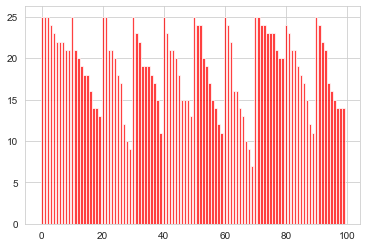

In [53]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using 
# pandas. Create a group based on the drug regimen and the timepoints.  From there you can get the number of x items to be displayed 
# based on the size of the grp.  The Y axis is the count of the Mouse ID column in the group.

clean_grp = clean_mouse_data.groupby(['Drug Regimen','Timepoint'])
x_axis = np.arange(0, len(clean_grp), 1)
y_axis = clean_grp['Mouse ID'].count()

# The ticks are the drug regiment and timepoint.  I stopped completing this since the requirements changed and the next 2 cells 
# cover the new requirements
tick_locations = []
tick_locations = clean_mouse_data[['Drug Regimen','Timepoint']].keys().tolist()

plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

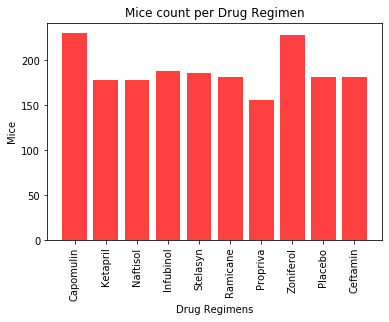

In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pyplot. Create a group based on the Drug Regimen and then count the number of mice per Regimen.

clean_grp = clean_mouse_data.groupby(['Drug Regimen'])

# the x axis is the regimens. which is the size of the group.  The y Axis is the count
x_axis = np.arange(0, len(clean_grp), 1)
y_axis = clean_grp['Mouse ID'].count()

# Place the Regimen names in the appropriate tick location and rotate 90 degrees for readability
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_mouse_data['Drug Regimen'].unique(),rotation=90 )

# Set the Title, y and x labels.
plt.title("Mice count per Drug Regimen")
plt.ylabel("Mice")
plt.xlabel("Drug Regimens")

# Plot out the graph.
plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
plt.show

Text(0.5, 1.0, 'Mice / Drug Regimen Relationship')

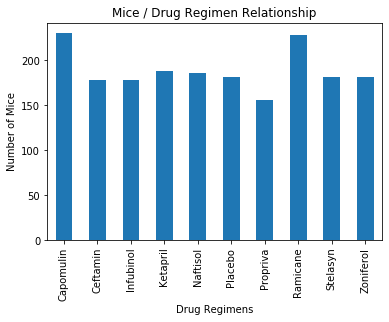

In [25]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# use the group created earlier and grab the count of mice.

clean_grp_bar = clean_grp["Mouse ID"].count()

# Plot the bar graph.
Multi_plot = clean_grp_bar.plot(kind="bar")

# Set the xlabel and ylabel using class methods
Multi_plot.set_xlabel("Drug Regimens")
Multi_plot.set_ylabel("Number of Mice")
Multi_plot.set_title("Mice / Drug Regimen Relationship")


## Pie Plots

Text(0.5, 1.0, 'Gender Demographics')

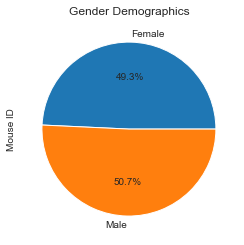

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.  Create a group based on the sex column.
clean_gender_grp = clean_mouse_data.groupby("Sex")

# create a pie chart with the counts of male and female mice
clean_grp_pie = clean_gender_grp["Mouse ID"].count()

# Plot the information.
gender_plot = clean_grp_pie.plot(kind="pie",autopct="%1.1f%%")
gender_plot.set_title("Gender Demographics")

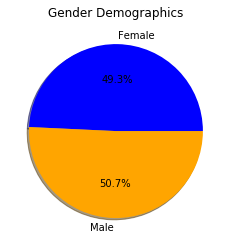

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
# Use the group from above and use Pyplot to produce the plot.

plt.title("Gender Demographics")
colors=["blue","orange"]
labels = ["Female","Male"]

plt.pie(clean_grp_pie,colors=colors,labels = labels, autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

Drug Regimen: Ramicane
IQR: 9.0985  Lower Bound is 17.9127  and the upper bound is 54.3068
 
Drug Regimen: Capomulin
IQR: 7.7819  Lower Bound is 20.7046  and the upper bound is 51.832
 
Drug Regimen: Infubinol
IQR: 11.4771  Lower Bound is 36.8329  and the upper bound is 82.7414
 
Drug Regimen: Ceftamin
IQR: 15.5778  Lower Bound is 25.3554  and the upper bound is 87.6665
 


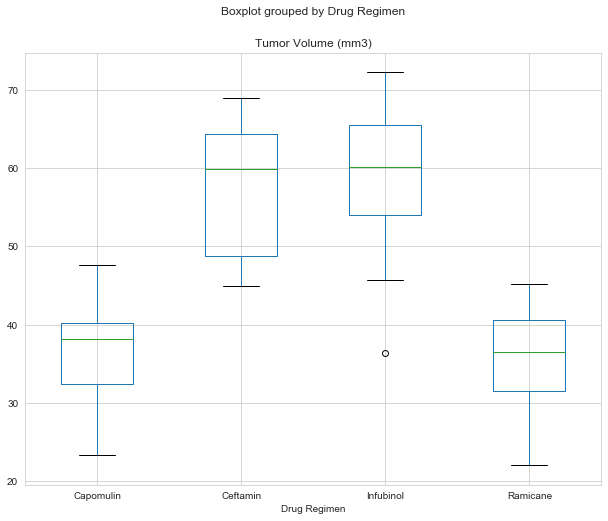

In [63]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# The list of top 4 Regimens were given, but if you look at the summary table they are the Regimens with the lost tumor
# size.

Regimen_list = ["Ramicane","Capomulin","Infubinol","Ceftamin"]

# Take a copy of the df and only include the 4 Regimens
timepoint = clean_mouse_data.copy()
timepoint = timepoint.loc[timepoint['Drug Regimen'].isin(Regimen_list),]

# Find the last tumor volume of for each mouse
max_timepoint = timepoint.groupby('Mouse ID').last()

# Not sure this is needed, but calulate the IQR and the upper and lower boundaries for each individual Regimens.
# For each Regimen in the list, loop through and perform the calculations.
for x in Regimen_list:
    print("Drug Regimen: " + x)                                              # Print out the Regimen
    
    # just have a gropu for that regimen and get the last value per mouse
    temp = timepoint.loc[timepoint['Drug Regimen'].isin([x]),]
    temp_timepoint = temp.groupby('Mouse ID').last()
    
    #Use quantile to get the 1QR and 3QR, and from there calculate the IQR
    Q1 = temp_timepoint['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = temp_timepoint['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3-Q1
    
    # From the IQR calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {round(IQR,4)}  Lower Bound is {round(lower_bound,4)}  and the upper bound is {round(upper_bound,4)}")
    print(" ")

# Plot the information for all four Regimens
tumor_plot = max_timepoint.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = True,widths=0.5,figsize=(10,8)) 
tumor_plot.set_ylabel = 'Tumor Volume'
plt.show()

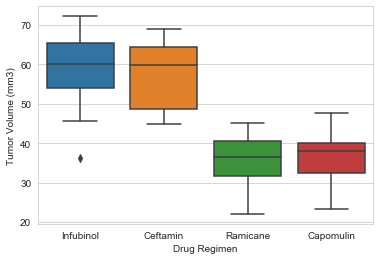

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Drug Regimen', y = 'Tumor Volume (mm3)', data = max_timepoint)


## Line and Scatter Plots

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601' 'l509' 'l897' 'w150' 's710' 'w914'
 'm601' 'u364' 'b742' 'v923' 'f966' 'x401' 'j119' 'i557' 'y793' 'g316'
 'r157' 'r944' 'r554' 's185' 'i738' 'j246' 't565' 'b128' 'g288' 'm957'
 'r554' 'u364' 'v923' 'g288' 's710' 'l509' 'i738' 'm957' 'j119' 'i557'
 'g316' 'y793' 'f966' 'm601' 'l897' 'r944' 'w914' 'w150' 't565' 's185'
 'b128' 'b742' 'x401' 'j246' 'r157' 's185' 'b128' 'g288' 'i738' 'm957'
 'r944' 'y793' 't565' 'j246' 'r157' 'g316' 'r554' 'j119' 'b742' 'x401'
 'i557' 'u364' 'l897' 'm601' 'w914' 's710' 'l509' 'f966' 'v923' 'u364'
 'f966' 'b128' 'b742' 'r554' 'm957' 's185' 'l509' 'w914' 'l897' 'r944'
 'j119' 'g316' 'j246' 'v923' 't565' 'y793' 'i557' 'g288' 'i738' 'm601'
 's710' 'x401' 'r944' 's710' 'j119' 't565' 'l509' 'i557' 'x401' 'l897'
 'w914' 'm601' 's185' 'u364' 'b742' 'v923' 'r554' 'g288' 'g316' 'b128'
 'm957

Text(0, 0.5, 'Tumor size')

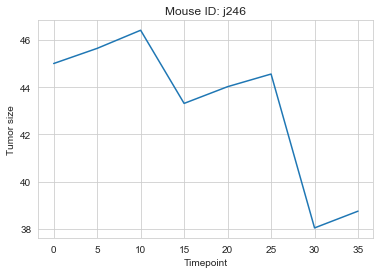

In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# create a dataframe with just the Capomulin regimen
capo_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# list out the Mouse IDs to select from
mouseids = capo_df['Mouse ID'].values
print(pd.Series(mouseids).values)

# Request the user to enter a mouse ID
mouse = input("please enter a mouse ID: ")
mouse_df = capo_df.loc[capo_df['Mouse ID'] == mouse]

# Plot the line chart for the mouse identified
line_plot = mouse_df.set_index('Timepoint')['Tumor Volume (mm3)'].plot();
line_plot.set_title(f'Mouse ID: {mouse}')
line_plot.set_ylabel('Tumor size')

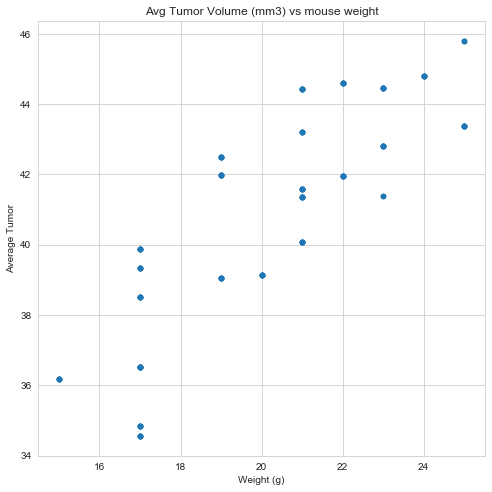

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regime

# Get the mean of the tumor size per mouse for the drug regiment Capomulin
tumor_mouse_mean = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# create a dataframe to merge it with the other data
df = pd.DataFrame(tumor_mouse_mean)

# rename the column
df = df.rename(columns = {'Tumor Volume (mm3)' : 'Average Tumor'})

# merge the 2 dataframes together
scatter_df = pd.merge(df,capo_df,how='left',on='Mouse ID')

# create a scatter plot of the data
scatter_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor", grid=True, figsize=(8,8), title="Avg Tumor Volume (mm3) vs mouse weight")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.83


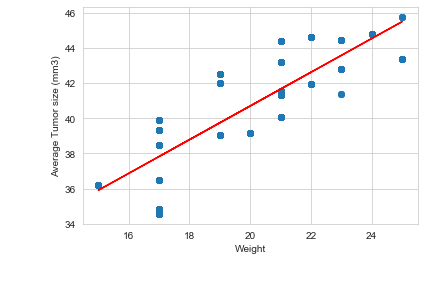

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# get the mouse weight and average tumor size from the scatter_dataframe
mouse_weight = scatter_df.iloc[:,8]
average_tumor = scatter_df.iloc[:,1]

# Generate the pearson coeeficient
correlation = st.pearsonr(mouse_weight,average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Set the x and values
x_values = scatter_df['Weight (g)']
y_values = scatter_df['Average Tumor']

# Get the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the line using the slope and intercept and print out the formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot information
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,30),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor size (mm3)')
plt.show()
